In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer.pitch import Pitch, add_image
from matplotlib.colors import to_rgba
import seaborn as sns
from PIL import Image
from urllib.request import urlopen
import matplotlib.image as mpimg
from matplotlib import cm
from matplotlib import colorbar
from sklearn.cluster import KMeans

In [58]:
# Read in data

image = Image.open("PremLogo.png")
image2 = Image.open("LeiLogo.png")

pd.set_option("display.max_rows", 40)
pd.set_option("display.max_columns", 15)
pd.set_option("display.width", None)

df = pd.read_csv("LeiData20.csv")
df = df.rename(columns={"type/displayName":"type", "outcomeType/displayName":"outcome"})

In [59]:
df = df[["teamId", "playerId", "outcome", "type", "x", "y", "endX", "endY"]]
df

,teamId,playerId,outcome,type,x,y,endX,endY
0,14,NaN,Successful,Start,0.0,0.0,NaN,NaN
1,13,NaN,Successful,Start,0.0,0.0,NaN,NaN
2,14,106413.0,Successful,Pass,50.0,50.0,41.3,46.1
3,14,136345.0,Successful,Pass,43.1,47.0,67.0,80.5
4,14,331382.0,Successful,Aerial,68.5,82.6,NaN,NaN
...,...,...,...,...,...,...,...,...
46597,14,NaN,Successful,End,0.0,0.0,NaN,NaN
46598,161,NaN,Successful,End,0.0,0.0,NaN,NaN
46599,14,NaN,Successful,End,0.0,0.0,NaN,NaN
46600,14,NaN,Successful,FormationSet,0.0,0.0,NaN,NaN


In [60]:
def_action = ["Aerial","BallRecovery","BlockedPass", "Challenge","Clearance", "Interception", "Tackle"]
df1 = df[df["playerId"]==136345]
df1 = df1[df1.type.isin(def_action)].reset_index()
df1

,index,teamId,playerId,outcome,type,x,y,endX,endY
0,206,14,136345.0,Successful,BlockedPass,33.2,25.5,NaN,NaN
1,298,14,136345.0,Successful,BlockedPass,75.4,88.7,NaN,NaN
2,320,14,136345.0,Successful,BallRecovery,42.8,63.0,NaN,NaN
3,504,14,136345.0,Unsuccessful,Tackle,60.2,87.5,NaN,NaN
4,643,14,136345.0,Unsuccessful,Tackle,53.8,70.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
432,46107,14,136345.0,Unsuccessful,Challenge,57.6,11.6,NaN,NaN
433,46228,14,136345.0,Unsuccessful,Challenge,36.6,60.4,NaN,NaN
434,46350,14,136345.0,Successful,BallRecovery,71.9,62.3,NaN,NaN
435,46423,14,136345.0,Successful,BallRecovery,30.8,88.3,NaN,NaN


In [61]:
succ = df1[df1["outcome"]=="Successful"].reset_index()
unsucc = df1[df1["outcome"]=="Unsuccessful"].reset_index()
succ

,level_0,index,teamId,playerId,outcome,type,x,y,endX,endY
0,0,206,14,136345.0,Successful,BlockedPass,33.2,25.5,NaN,NaN
1,1,298,14,136345.0,Successful,BlockedPass,75.4,88.7,NaN,NaN
2,2,320,14,136345.0,Successful,BallRecovery,42.8,63.0,NaN,NaN
3,5,699,14,136345.0,Successful,BallRecovery,36.9,42.2,NaN,NaN
4,6,785,14,136345.0,Successful,Tackle,34.4,91.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
332,430,45946,14,136345.0,Successful,BallRecovery,26.2,60.8,NaN,NaN
333,431,46039,14,136345.0,Successful,Tackle,47.0,58.4,NaN,NaN
334,434,46350,14,136345.0,Successful,BallRecovery,71.9,62.3,NaN,NaN
335,435,46423,14,136345.0,Successful,BallRecovery,30.8,88.3,NaN,NaN


In [62]:
#Implement Kmeans Algo for succ

X = np.array(succ[["y", "x"]])
kmeans = KMeans(n_clusters = 10,random_state=100)
kmeans.fit(X)
succ["cluster"] = kmeans.predict(X)
succ.cluster.value_counts()
#succ

0    47
2    43
7    37
4    37
9    35
8    33
3    31
5    28
1    26
6    20
Name: cluster, dtype: int64

In [63]:
#Implement Kmeans Algo for unsucc

X = np.array(unsucc[["y", "x"]])
kmeans = KMeans(n_clusters = 10,random_state=100)
kmeans.fit(X)
unsucc["cluster"] = kmeans.predict(X)
unsucc.cluster.value_counts()
#unsucc

2    17
1    16
4    12
6    11
9    10
7     9
8     8
3     6
0     6
5     5
Name: cluster, dtype: int64

In [132]:
succlist = [0,2,7]
succ_clust = succ[succ.cluster.isin(succlist)]

unsucclist = [2,1,4]
unsucc_clust = unsucc[unsucc.cluster.isin(unsucclist)]

'''succ_cluster1 = succ[succ["cluster"]==0] 
succ_cluster2 = succ[succ["cluster"]==2]
succ_cluster3 = succ[succ["cluster"]==7]

unsucc_cluster1 = unsucc[unsucc["cluster"]==2] 
unsucc_cluster2 = unsucc[unsucc["cluster"]==1]
unsucc_cluster3 = unsucc[unsucc["cluster"]==4]'''

#succ_col = succ_clust.cluster.value_counts()/100
#unsucc_col = unsucc_clust.cluster.value_counts()/100

#colors = [succ_col, unsucc_col]

colors = ["#95d5b2", "#52b788", "#2d6a4f"]
group = ["3 Most Freq. Successful Def Actions\n(HMap All Successful Def Actions)", 
         "3 Most Freq. Unsuccessful Def. Actions\n(HMap All Unsuccessful Def Actions)"]

#clusters = [succ_cluster1, succ_cluster2, succ_cluster3, unsucc_cluster1, unsucc_cluster2, unsucc_cluster3]
clusters = [succ_clust, unsucc_clust]
hmap = [succ, unsucc]
clusteravg = ["Avg xT = 0.06", "Avg xT = 0.12", "Avg xT = 0.14"]
succ_clust

succ_col

0    0.47
2    0.43
7    0.37
Name: cluster, dtype: float64

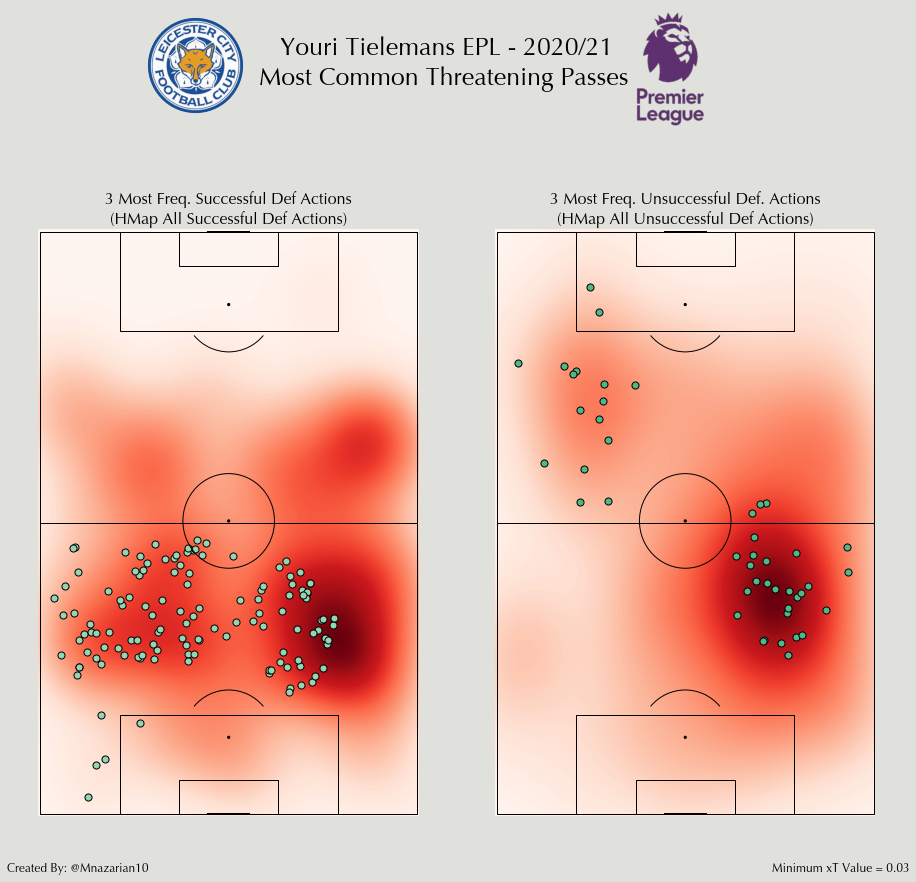

In [133]:
fig, axes = plt.subplots(1,2, figsize=(15, 12))
fig.set_facecolor('#e0e1dd')
fig.patch.set_facecolor('#e0e1dd')

'''pitch = Pitch(pitch_type='statsbomb', figsize=(16, 9), layout=(1, 2), pitch_color='#22312b',
              stripe=False, line_zorder=2)
fig, ax = pitch.draw()
pitch.hexbin(df_before_false9.x, df_before_false9.y, gridsize=10, ax=ax[0], cmap='Blues')
pitch.hexbin(df_false9.x, df_false9.y, gridsize=10, ax=ax[1], cmap='Blues')'''



pitch = Pitch(pitch_type='opta', orientation='vertical', pad_top = 3,layout=(1,2),
              pitch_color='#e0e1dd', line_color='black', figsize=(10, 8),
              constrained_layout=False, tight_layout=True, view="full", linewidth=1, line_zorder=2)

#fig, ax = pitch.draw()
#plt.gca().invert_xaxis()

for i, ax in enumerate(fig.axes):
    pitch.draw(ax=ax)
    ax.set_title(group[i], fontsize=16, fontfamily="Optima", fontweight="bold")
    ax.set_xlim(-0.5,100.5)
    ax.set_ylim(-0.5,100.5)
    ax.invert_xaxis()
    #ax.text(clusteravg[i], fontsize=10, fontfamily="Optima", fontweight="bold")
    #for x in range(len(succ["cluster"])):
    ax.scatter(clusters[i].y, clusters[i].x, c=colors[i], alpha=1, zorder=2, cmap="cividis", edgecolors ="black", 
               s=50, vmin=0, vmax=7)
    kde = sns.kdeplot(hmap[i].y, hmap[i].x, shade= True, #shade_lowest= False, #alpha= 0.45, #n_levels= 400, #fill = True,
                      thresh=0, levels=200, cmap= "Reds", zorder=1, ax=ax)

    
    
            
    #if xTdfPlayer["cluster"][x]==7:
        #pitch.lines(xTdfPlayer["x"][x], xTdfPlayer["y"][x], xTdfPlayer["endX"][x], xTdfPlayer["endY"][x],
                #lw=3, comet=True, color= "orange", ax=ax)
    #if xTdf["cluster"][x]==5:
        #pitch.lines(xTdf["x"][x], xTdf["y"][x], xTdf["endX"][x], xTdf["endY"][x],
                #lw=3, comet=True, color= "red", ax=ax)
        
        #plt.scatter(df["endX"][x], df["endY"][x], c="lime", alpha=1, zorder=2,
                    #edgecolors = "black", s=80, marker="D")

fig.suptitle("\n Youri Tielemans EPL - 2020/21\nMost Common Threatening Passes\n", fontsize=25, color="black", 
             fontfamily="Optima", fontweight = 'bold', y=1.1)
plt.text(230,-10,"Created By: @Mnazarian10", fontfamily="Optima", fontweight = 'bold', color='black', fontsize=12)
plt.text(27,-10,"Minimum xT Value = 0.03", fontfamily="Optima", fontweight = 'bold', color='black', fontsize=12)

#Player
ax_image = add_image(image, fig, left=0.63, bottom=0.96, width=0.16,
                   alpha=0.9, interpolation='hanning')

ax_image2 = add_image(image2, fig, left=0.225, bottom=0.975, width=0.0915,
                   alpha=0.9, interpolation='hanning')